In [5]:
%matplotlib inline 
import pandas as pd
import numpy as np
#import pylab as plt 
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns #sets up styles and gives us more plotting options

In [19]:
def data_prep(dataFrame):
    dataFrame=dataFrame.drop("Name", axis=1)
    dataFrame=dataFrame.drop("Ticket", axis=1)
    dataFrame=dataFrame.drop("Cabin", axis=1)
    dataFrame=dataFrame.drop("Fare", axis=1)
    dataFrame['Embarked'] = dataFrame['Embarked'].fillna("U")
    #dataFrame=dataFrame.dropna()
    pclass_mapping = {label:idx for idx, label in enumerate(np.unique(dataFrame.Sex))}
    dataFrame['Sex'] = dataFrame['Sex'].map(pclass_mapping)
    emb_mapping = {label:idx for idx, label in enumerate(np.unique(dataFrame.Embarked))}
    dataFrame['Embarked'] = dataFrame['Embarked'].map(emb_mapping)
    dataFrame=dataFrame.fillna(-1)
    return dataFrame

In [20]:
clean_data = pd.read_csv("train.csv")

In [21]:
clean_data = data_prep(clean_data)

In [23]:
sns.set(style="whitegrid", color_codes=True)

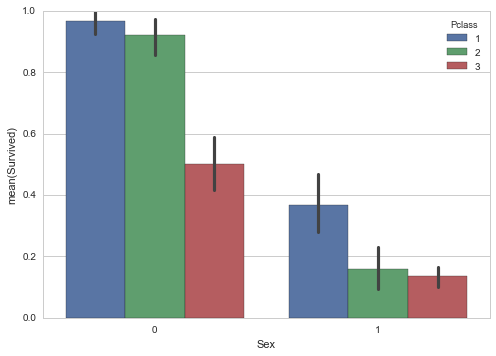

In [24]:
sns.barplot(x="Sex", y="Survived", hue='Pclass', data=clean_data)

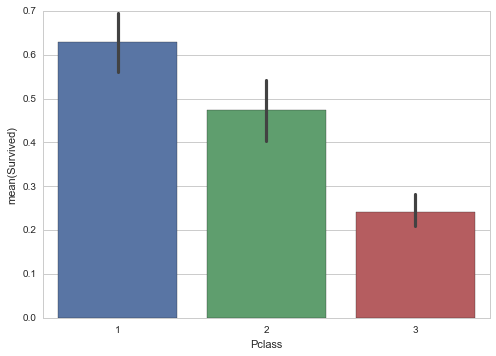

In [25]:
sns.barplot(x="Pclass", y="Survived", data=clean_data)

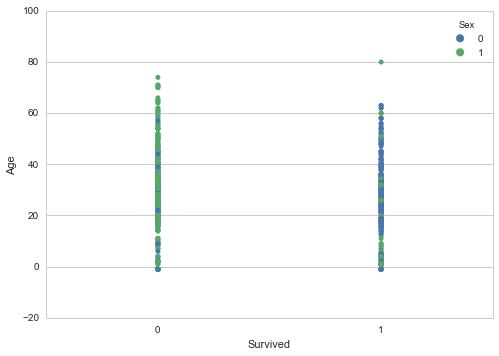

In [26]:
sns.stripplot(x='Survived', y='Age', hue='Sex', data=clean_data)

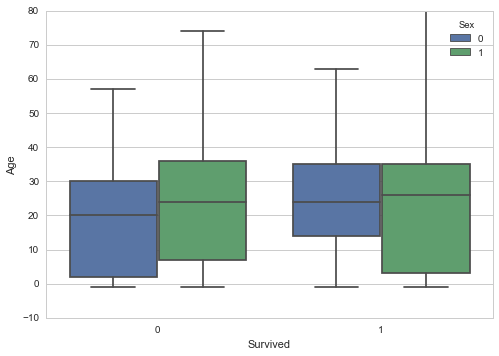

In [27]:
sns.boxplot(x='Survived', y='Age', hue='Sex' , data=clean_data)

In [29]:
gr_data = clean_data['Sex'].groupby(clean_data['Pclass'])

In [30]:
a = gr_data.count()
b = gr_data.sum()

In [31]:
print(a)
print(b)
a - b

Pclass
1    216
2    184
3    491
Name: Sex, dtype: int64
Pclass
1    122
2    108
3    347
Name: Sex, dtype: int64


Pclass
1     94
2     76
3    144
Name: Sex, dtype: int64

In [32]:
a = clean_data.groupby(['Pclass', 'Sex'])

In [33]:
a.Survived.sum()

Pclass  Sex
1       0      91
        1      45
2       0      70
        1      17
3       0      72
        1      47
Name: Survived, dtype: int64

In [34]:
a.Survived.count()

Pclass  Sex
1       0       94
        1      122
2       0       76
        1      108
3       0      144
        1      347
Name: Survived, dtype: int64

In [35]:
a.Embarked.sum()

Pclass  Sex
1       0      103
        1      159
2       0      136
        1      195
3       0      209
        1      569
Name: Embarked, dtype: int64

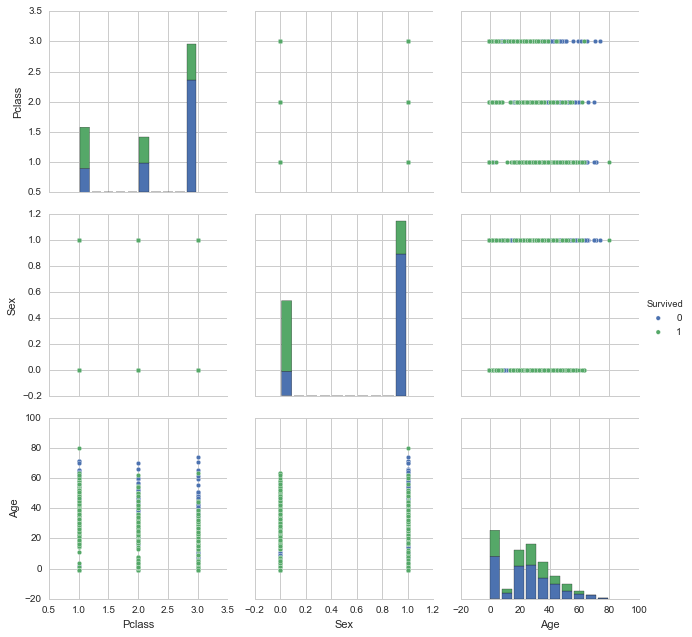

In [36]:
sns.pairplot(clean_data, vars=["Pclass", "Sex", "Age"], hue="Survived", size=3)

In [37]:
train_clean = clean_data

In [38]:
clean_data_test = pd.read_csv("test.csv")

In [40]:
test_clean = data_prep(clean_data_test)

In [41]:
test_clean.shape

(418, 7)

In [42]:
test_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


In [43]:
train_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
sc.fit(train_clean.iloc[:,2:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
train_clean_stn = sc.transform(train_clean.iloc[:,2:])

In [61]:
test_clean_stn = sc.transform(test_clean.iloc[:,1:])

In [62]:
from sklearn.cross_validation import train_test_split

In [63]:
response = train_clean.iloc[:,1].as_matrix()

In [64]:
type(response)

numpy.ndarray

In [65]:
response = response.astype(int)

In [53]:
X_tr, X_te, y_tr, y_te = train_test_split(train_clean_stn,response, test_size = .2, random_state =1  )

In [73]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
C=[1000,100,10,1,.1,.01,.001,100]
for c in C:
    logistic = LogisticRegression(C=c, random_state=0)
    logistic.fit(X_tr,y_tr)
    predict = logistic.predict(X_te)
    accu = metrics.accuracy_score(y_te,predict)
    print(accu)

0.782122905028
0.782122905028
0.782122905028
0.782122905028
0.782122905028
0.77094972067
0.765363128492
0.782122905028


In [55]:
#Suppport vector machines
from sklearn.svm import SVC
C=[1000,100,10,1,.1,.01]
for c in C:
    suppVec = SVC(C=c,kernel='linear', random_state=0)
    suppVec.fit(X_tr,y_tr)
    predSVM = suppVec.predict(X_te)
    accSVM = metrics.accuracy_score(y_te,predSVM)
    print(accSVM)

0.776536312849
0.776536312849
0.776536312849
0.776536312849
0.776536312849
0.776536312849


In [74]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
N = [1,2,5,10,20,50,100,20]
for n in N:
    knn_clf = KNeighborsClassifier(n_neighbors=n, p=2, metric='minkowski')
    knn_clf.fit(X_tr,y_tr)
    knn_pred = knn_clf.predict(X_te)
    accKNN=metrics.accuracy_score(y_te,knn_pred)
    print(accKNN)

0.698324022346
0.72625698324
0.765363128492
0.765363128492
0.782122905028
0.798882681564
0.782122905028
0.782122905028


In [57]:
#Desicion tree
from sklearn.tree import DecisionTreeClassifier
D = [2,3,4,5,6,10,5]
for d in D:
    dtree = DecisionTreeClassifier(max_depth=d, criterion='entropy',random_state=0)
    dtree.fit(X_tr,y_tr)
    dtree_pred = dtree.predict(X_te)
    accDtree=metrics.accuracy_score(y_te,dtree_pred)
    print(accDtree)

0.743016759777
0.77094972067
0.737430167598
0.776536312849
0.77094972067
0.765363128492
0.776536312849


In [58]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
N = [10,20,30,100,500]
for n in N:
    ranFor = RandomForestClassifier(n_estimators=n,criterion='gini',random_state=0,n_jobs=2,min_samples_split=8, min_samples_leaf=2)
    ranFor.fit(X_tr,y_tr)
    ranFor_pred = ranFor.predict(X_te)
    accRanFor = metrics.accuracy_score(y_te,ranFor_pred)
    print(accRanFor)

0.748603351955
0.77094972067
0.776536312849
0.776536312849
0.77094972067


In [66]:
clean_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
dtype: object

In [67]:
from sklearn.cross_validation import StratifiedKFold
print(c)

0.01


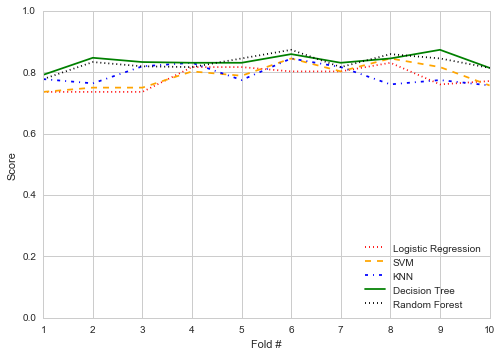

In [68]:
#%debug
#clfs = ['logistic', 'suppVec', 'knn_clf', 'dtree', 'ranFo']
clfs = [logistic, suppVec, knn_clf, dtree, ranFor]
clf_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']
colors = ['red', 'orange', 'blue', 'green', 'black']
linestyles = [':', '--', '-.', '-',':']

kfold = StratifiedKFold(y=y_tr, n_folds=10, random_state=0)
scores=[]
ks=[]
c=100
#logistic = LogisticRegression(C=100, random_state=0)
#import ipdb; ipdb.set_trace()
for algo, lable, clr, ls in zip(clfs, clf_names,colors,linestyles):
    scores=[]
    ks=[]
    #print(algo)
    for k, (train,test) in enumerate(kfold):
        algo.fit(X_tr[train], y_tr[train])
        score = algo.score(X_tr[test], y_tr[test])
        scores.append(score)
        ks.append(k+1)
        #print(score)
        #print(k,score)
        #print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_tr[train]), score))
    plt.plot(ks,scores,color=clr,linestyle=ls,label=lable)
    
plt.legend(loc='lower right')
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.grid(True)
plt.xlabel('Fold #')
plt.ylabel('Score')
plt.show()

In [70]:
predict_test = dtree.predict(test_clean_stn)

In [71]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": predict_test
    })
submission.to_csv("forSubmission.csv")

In [72]:
test_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


In [76]:
predict_logistic = logistic.predict(test_clean_stn)
predict_knn = knn_clf.predict(test_clean_stn)

In [77]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": predict_logistic
    })
submission.to_csv("predict_logistic.csv")

In [78]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": predict_knn
    })
submission.to_csv("predict_knn.csv")